# Decision Tree Regressor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# California House Pricing Dataset
from sklearn.datasets import fetch_california_housing
dataset=fetch_california_housing()

In [5]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
df=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
df['Target']=dataset.target

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
df.shape

(20640, 9)

In [11]:
# Taking Sample Data
df=df.sample(frac=0.25)

In [12]:
df.shape

(5160, 9)

In [13]:
#Indepenent and Dependent Features
X=df.drop(columns=['Target'])
y=df['Target']

In [14]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [16]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [17]:
y_pred=regressor.predict(X_test)

In [20]:
from sklearn.metrics import r2_score

In [21]:
# Accuracy (R2 Score)
print(r2_score(y_test,y_pred))

0.5295977112828476


In [26]:
# Hyperparameter Tuning
parameter={
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':['auto','sqrt','log2']
}
regressor=DecisionTreeRegressor()

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,scoring='neg_mean_squared_error')

In [29]:
regressorcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [30]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

In [31]:
y_pred=regressorcv.predict(X_test)

In [32]:
# Accuracy (R2 Score)
r2_score(y_test,y_pred)

0.6142627650601139

In [33]:
clf=DecisionTreeRegressor(criterion='poisson',max_depth=10,max_features='log2',splitter='best')

In [34]:
clf.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features='log2')

In [35]:
y_pred=clf.predict(X_test)

In [36]:
# Accuracy (R2 Score)
r2_score(y_test,y_pred)

0.6498932161017081

In [37]:
from sklearn import tree

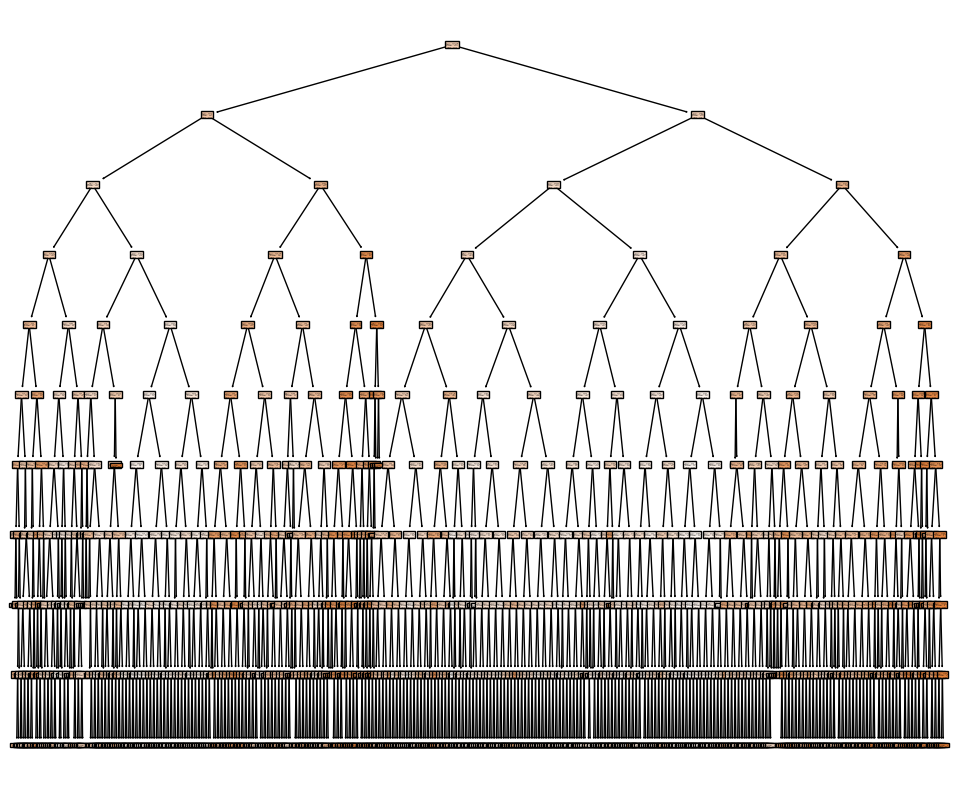

In [40]:
plt.figure(figsize=(12,10))
tree.plot_tree(clf,filled=True)
plt.show()